In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline

In [3]:
#####  Function to compute time for wall collision ######
def wall_time(coord, velcomp, rad):  
    if velcomp > 0.0:
        del_t = (1.0 - rad - coord) / velcomp
    elif velcomp < 0.0:
        del_t = (coord - rad) / abs(velcomp)
    else:
        del_t = float('inf')
    return del_t


# Function to calculate time it takes for a pair of particles to collide. 
# pos1 and pos2 are positions of particles 1 and 2, vel1 and vel2 are their 
# velocities. rad is the radius of the particles. 
def pair_time(pos1, vel1, pos2, vel2, rad):  
    rel_pos = pos2 - pos1
    rel_vel = vel2 - vel1
    rel_dist_squar = np.dot(rel_pos,rel_pos)
    rel_speed_squar = np.dot(rel_vel,rel_vel)
    scal_prod = np.dot(rel_pos,rel_vel)
    a = scal_prod ** 2 - rel_speed_squar * ( rel_dist_squar - 4.0 * rad **2)
    if a > 0.0 and scal_prod < 0.0: ## Conditions for collision.
        del_t = - (scal_prod + np.sqrt(a)) / rel_speed_squar ## Collision time.
    else:
        del_t = float('inf')
    return del_t

def overlap(pos1, pos2,rad):   ##  to check if the initial positions overlap
    rel_pos = pos2 - pos1       ## here a must be<2R
    rel_dist_squar = np.dot(rel_pos,rel_pos)
    a = rel_dist_squar
    return(a)

# Function to generate an image of the disk configuration in the box.
def create_picture(positions):
    plt.cla()
    plt.gca().set_aspect('equal')
    plt.axis([0, L, 0, L])
    plt.setp(plt.gca(), xticks=[0, L], yticks=[0, L])
    for x,y in positions:
        atom = plt.Circle((x, y), Ratom, fc='r')
        plt.gca().add_patch(atom)
    

pos_initial [[0.43017329 0.17913945]
 [0.44733513 0.49298975]
 [0.1176563  0.39257483]
 [0.46398306 0.3552104 ]
 [0.05888195 0.49933823]
 [0.22856127 0.46992745]
 [0.10951367 0.01832179]
 [0.33535217 0.16638381]
 [0.23831899 0.05241183]
 [0.39288129 0.35427542]
 [0.01577389 0.157252  ]
 [0.14169601 0.1422045 ]
 [0.49686148 0.00344604]
 [0.14562028 0.3261926 ]
 [0.31485011 0.39767843]
 [0.02894551 0.38567404]
 [0.12875886 0.46721426]
 [0.03387851 0.30291316]
 [0.3353126  0.30524054]
 [0.23111656 0.31504578]]


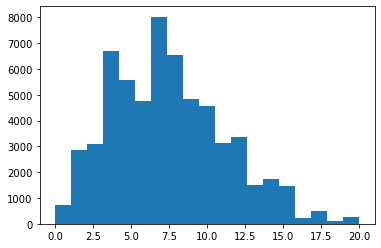

In [32]:
######################### Initialization #################################
L = 1. ## Box edge length
Natoms =20  # Number of disks
density = 0.01 # Fraction of the area of the box covered by the disks
Ratom = np.sqrt(density/(Natoms*np.pi))   ## Radius of disk.
pos_inst=[]

## List indexing all pairs of atoms.
pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)] 

hist_data=[]
velocities=[]
for i in range(Natoms):    ###########   initial random velocities  ###########
    rand1=random.randint(-100,100)
    rand2=random.randint(-100,100)
    vx_rand=rand1/10
    vy_rand=rand2/10
    v = np.array([vx_rand,vy_rand])
    velocities.append(v)

while True:
    positions=(np.random.random_sample((Natoms, 2)))/2  ### creates a Natom x 2 random matrix from (0-1)/2
    a = [overlap(positions[i],positions[j], Ratom) for i,j in pairs]
    #print(a) 
    res = all(rad>Ratom for rad in a) ### condition for balls not to overlap
    if res==True:
       # create_picture(positions)  
        break
print("pos_initial",positions)

t = 0 # Initial time.
n_events = 3000 # Number of collision events.
#print(pairs)
hist_data=[]
#################################################################################
############### Event Loop ##############################################
for event in range(n_events):
    # Wall collision times for all disks and their velocity components.
    
    wall_times = [wall_time(positions[i][j], velocities[i][j], Ratom) for i in range(Natoms) for j in range(2)] 
    # Pair collision times  ## pos[i][j]=ith ball and jth coordinate  j here is component
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision event is the minimum of wall and pair collision times.
    next_event = min(wall_times + pair_times)  
    #################  snapshots ###############
    t_inst=np.linspace(t,next_event,10)
    t_list=np.delete(t_inst,len(t_inst)-1)
    for snapshot_time in t_list:
        result = np.where(t_list == snapshot_time)
        ind=result[0][0]
        delta_t=t_inst[ind+1]-t_inst[ind]
        for i in range(Natoms):
            positions[i] += velocities[i]*(delta_t)
    for k in range(Natoms):        
        hist_data.append(np.sqrt(velocities[k][0]**2+velocities[k][1]**2))
    
    
    ############################  #########################
   
    if min(wall_times) < min(pair_times): # Check if next event is a collision with a wall
        wall_index = wall_times.index(next_event)
        particle, component = divmod(wall_index, 2)
        velocities[particle][component] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_event)
        particle_1, particle_2 = pairs[pair_index] # Indices of particles participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp
    #print(positions)

sep=np.linspace(0,20,20)
#print(hist_data)
plt.hist(hist_data, bins = sep)
plt.show()
##################################################################################
#print("vel",velocities)

pos_final [[0.84339654 0.55007458]
 [0.87511452 0.43338812]
 [0.28019512 0.66808779]
 [0.41439919 0.58266828]
 [0.35174605 0.3732296 ]
 [0.31808594 0.14590377]
 [0.52035506 0.04290635]
 [0.97996037 0.6114688 ]
 [0.29274526 0.56068346]
 [0.58382754 0.86591191]
 [0.55994245 0.28990245]
 [0.85964763 0.20830253]
 [0.00356825 0.78734751]
 [0.12879641 0.94422609]
 [0.27131378 0.60170204]
 [0.62459414 0.53220716]
 [0.18677361 0.24081642]
 [0.70983438 0.27052213]
 [0.76759512 0.98717391]
 [0.67228893 0.50207372]
 [0.98690439 0.2952185 ]
 [0.82673332 0.3126496 ]
 [0.57441699 0.43908422]
 [0.30577425 0.08918118]
 [0.89711267 0.15234857]]


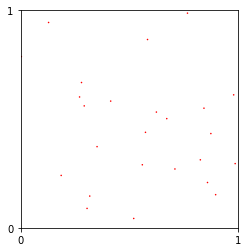

In [22]:
velocities=-1*np.array(velocities)
t = 0 # Initial time.
n_events = 50 # Number of collision events.
#print(pairs)
#################################################################################
############### Event Loop ##############################################
for event in range(n_events):
    # Wall collision times for all disks and their velocity components.
    wall_times = [wall_time(positions[i][j], velocities[i][j], Ratom) for i in range(Natoms) for j in range(2)] 
    # Pair collision times  ## pos[i][j]=ith ball and jth coordinate  j here is component
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision event is the minimum of wall and pair collision times.
    next_event = min(wall_times + pair_times)  
    #################  snapshots ###############
    t_inst=np.linspace(t,next_event,10)
    t_list=np.delete(t_inst,len(t_inst)-1)
    for snapshot_time in t_list:
        result = np.where(t_list == snapshot_time)
        ind=result[0][0]
        delta_t=t_inst[ind+1]-t_inst[ind]
        for i in range(Natoms):
            positions[i] += velocities[i]*(delta_t)
        pos_inst.append(positions)
    ############################  #########################
    if min(wall_times) < min(pair_times): # Check if next event is a collision with a wall
        wall_index = wall_times.index(next_event)
        particle, component = divmod(wall_index, 2)
        velocities[particle][component] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_event)
        particle_1, particle_2 = pairs[pair_index] # Indices of particles participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp
    #print(positions)

create_picture(positions) 
print("pos_final",positions)
##################################################################################

